# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Sara Buchta 

**ID**: srb289

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [43]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\srbuc\OneDrive\Desktop\hw1\hw1-srb289`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [44]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [45]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [46]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


The code provided does not work, because the initial value for the minimum (variable min_value) is set to zero, which could be (and in this case is) lower than all values in the array. The variable min_value will only change when a value in the array is lower than it. Therefore, it can be set to the first value in the array to ensure that it will only return values from the array, or be set to positive infinity to ensure that it cannot be smaller than all the values in the array.

In [47]:
function minimum(array)
    min_value = Inf
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [48]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

This is an issue of not correctly using global and function variables. The array of grades is called *student_grades* outside the function, but should get passed into the function as *grades*. Inside the function, the average is computed as the variable *average_grade*, which is then returned. This code makes the mistake of not calling the function and passing in the variable containing the array, but rather trying to access the function variable *average_grade* from outside the function.

In [49]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = sum(student_grades)/length(student_grades)
  return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [50]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

The code tries to establish *outcomes* as a holding place for the results, but initializes it as a single number, not an array, because it uses *zero* not *zeros*.

In [51]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end

n_trials = 1000
outcomes = zeros(n_trials)

for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.382


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [52]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.



The purpose of mystery function is to return the list of values it is fed, removing any duplicates.

In [53]:
function mystery_function(values)
    # Removes all duplicates from input array values
    y = []
    for v in values
        # Adds each non-duplicate (not already added) element of values to y
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

# Test of function with example array
list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


The built in function *union* does the same thing

In [54]:
@show union(list_of_values)

union(list_of_values) = [1, 2, 3, 4]


4-element Vector{Int64}:
 1
 2
 3
 4

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.



In [149]:
function compute_mean(v)
    # computes mean of a vector V
    sum = 0
    l = length(v)
    # adds together each element of the vector, then divides by the vector
    for i in 1:l
        sum = sum + v[i]
    end
    mean = sum/l
    return round(mean,digits = 7)
end


compute_mean (generic function with 1 method)

In [151]:
random_vect = rand(10)

10-element Vector{Float64}:
 0.10254496671885516
 0.1702868364376463
 0.7188220972144731
 0.9989453545581068
 0.25035464435614463
 0.7659021404644245
 0.1755749022007831
 0.6034004314273509
 0.053887961271693485
 0.8473237480109937

In [152]:
m = compute_mean(random_vect)


0.4687043

In [153]:
new_vect = random_vect .- m

10-element Vector{Float64}:
 -0.36615933328114486
 -0.2984174635623537
  0.2501177972144731
  0.5302410545581069
 -0.2183496556438554
  0.2971978404644245
 -0.29312939779921693
  0.13469613142735087
 -0.41481633872830653
  0.37861944801099373

In [154]:
compute_mean(new_vect)

0.0

As expected, the mean of this new vector is zero.

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

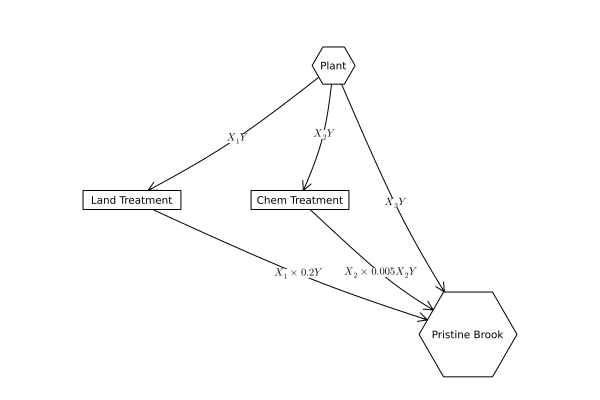

In [61]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1Y", (1,3) => L"X_2Y", (1, 4) => L"X_3Y",(2, 4) => L"X_1 \times 0.2Y",(3, 4) => L"X_2 \times 0.005X_2Y")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?


**Model of problem:**
$X_1$, $X_2$, and $X_3$ are variables representing the amount of wastewater disposed by land disposal, chemical treatment, and direct dumping, respectively. $Y = 1 kg/m^3$ is the concentration of YUK in the wastewater.

Since the sum of the wastewater sent to each disposal method must equal the total amount of wastewater produced, and no disposal method can recieve a negative amount of wastewater:

$X_1 + X_2 + X_3 = 100 m^3/day$.

$0 m^3/day\leq X_1\leq 100 m^3/day$

$0 m^3/day\leq X_2\leq 100 m^3/day$

$0 m^3/day\leq X_3\leq 100 m^3/day$


The total mass of YUK added to the river must be less than 20 $kg/day$, so:

$YUK = X_1\times 0.20 Y + X_2\times.005(X_2)Y + X_3Y \leq 20 kg/day$

The treatment cost C is found by:

$C(X_1,X_2,X_3)= \frac {X_1^2}{20} + 1.5X_2$

The following code establishes a function to calculate cost C and YUK according to the equations above given a combination of treatment flows.

In [114]:
function treatment_cost_YUK(x1,x2,x3)
    # computes the cost and YUK addition from a treatment plan according to the model above
    y=1
    C = x1^2/20 + 1.5x2
    YUK = x1*.2*y + x2*.05*y + x3*y
    return(C,YUK)
end

treatment_cost_YUK (generic function with 2 methods)

The following code tests the cost and YUK input to the brook for a variety of combinations.

In [118]:
# test case
x1s = [0 100 0 20 80 50 0]
x2s = [0 0 100 70 10 20 85] 
x3s = [100 0 0 10 10 30 15]

# finds and displays outputs for test cases
output = treatment_cost_YUK.(x1s,x2s,x3s)
costs = [out[1] for out in output]
YUKs = [out[2] for out in output]
@show costs;
@show YUKs;

costs = [0.0 500.0 150.0 125.0 335.0 155.0 127.5 124.55]
YUKs = [100.0 20.0 5.0 17.5 26.5 41.0 19.25 17.35]


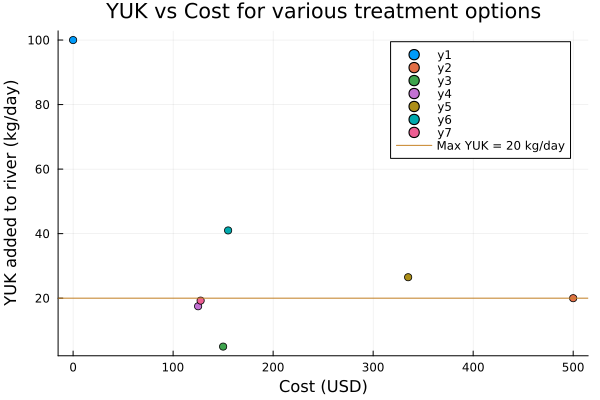

In [117]:
# graph test cases
labels = ["0,0,100","100,0,0","0,100,0","20,70,10","80,10,10","50,20,30","0,85,15","Max YUK = 20"]
scatter(costs,YUKs)
hline!([20],label="Max YUK = 20 kg/day")
xlabel!("Cost (USD)")
ylabel!("YUK added to river (kg/day)")
title!("YUK vs Cost for various treatment options")


Generally, cost decreases as YUK added to river decreases, because treatment is more expensive. It is also much more expensive to treat wastewater using the chemical treatment method compared to the land disposal (1.50 USD vs 0.05 USD), so even when accounting for the land disposal's higher efficiency at low concentrations, it is cheaper to rely as much as possible on land disposal. The cheapest acceptable solution I found was to send 20 $m^3$ to land disposal, 70 $m^3$ to chemical treatment and the remaining 10 $m^3$ directly to the river. This gives a YUK addition to the river of 17.5 and a cost of 125 USD. There is room to find a cheaper solution, because the YUK addition is not yet at the max, so more wastewater can be directly disposed to the river. Additionally, at this point, the cost and efficiency of land disposal are 5 USD and 80% vs 1.5 USD and 65% for chemical treatment, so the costs per kg YUK removed are 6.25 USD vs 2.31 USD, respectively, so more wastewater should be shifted towards chemical treatment.

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.